In [1]:
import pandas as pd

In [7]:
import data.data_wrangling as dw

import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from sklearn.cluster import KMeans

In [2]:
# Read in data and get column names

data = pd.read_csv('data/synthetic_income.csv')

data.shape

(22674, 14)

In [3]:
# data with outlier detection values

data_w_outlier_val = data.copy()

# outcome variable label

outcome = 'income'

# id column label

id_col = 'id'

# list of categorical columns

# obtained from kaggle website
cat_col = ['workclass', 'education',
           'marital-status', 'occupation', 
           'relationship',
           'race', 'sex', 
           'native-country', 'income']

# categorical columns without outcome variable

cat_col_wo_outcome = [col for col in cat_col if col != outcome]

# cat cols without outcome and two category values

cat_col_more_than_2 = list()
for col in cat_col:
    if data[col].nunique() > 2:
        cat_col_more_than_2.append(col)

cat_col_2_or_fewer = list(set(cat_col) - set(cat_col_more_than_2))

# list of non-id numeric columns

num_col = [col for col in data.columns if col not in cat_col and col != id_col]

In [4]:
# Convert categorical columns to "categorical" in pandas

data_with_cat = dw.convert_col_to_cat(data, cat_col)

data_with_cat.head()

NameError: name 'dw' is not defined

In [5]:
# equal width discretization of numeric columns

data_with_cat = dw.convert_num_to_obj(data_with_cat, num_col)

NameError: name 'dw' is not defined

In [11]:
data_all_num = dw.convert_cat_to_numeric(data, cat_col_more_than_2, cat_col_2_or_fewer)

In [12]:
X = data_all_num.drop(columns=['id', 'income'])

In [15]:
X_scaled = dw.standardize_numeric_variables(X, X.columns)

/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
# create kmeans object
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(X)

In [34]:
col_names = X.columns

import itertools
col_pairs = [col for col in itertools.product(col_names, repeat=2)]

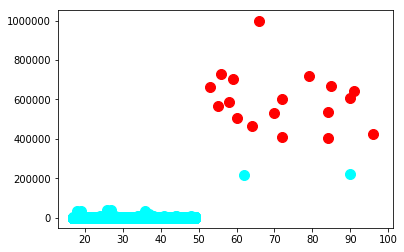

In [35]:
var_pair = ('age', 'capital-gain')
plt.scatter(X.loc[y_km == 0, var_pair[0]], X.loc[y_km == 0, var_pair[1]], s=100, c='cyan')
plt.scatter(X.loc[y_km == 1, var_pair[0]], X.loc[y_km == 1, var_pair[1]], s=100, c='red')